In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Fórmulas

Dif. Finita Progressiva: y' = (y1+1 - yi) / h
Dif. Finita Regressiva: y' = (yi - yi-1) / h
Dif. Finita Centrada: y' = (y1+1 - yi-1) / 2h
y" = (yi+1 - 2yi + yi - 1) / h**2 

# Condições de Contorno

Dirichlet: y(x0) = y0 / y(xf) = yf (Na função)

Newman: y'(x0) = y'0 / y'(xf) = y'f (Na derivada)

Robin: y(x0) = y0 / y'(xf) = yf' ou y'(x0) = y'0 / y(xf) = yf (Mista)

# Algoritmo de Thomas 

In [2]:
def algoritmo_thomas(diag_abaixo: list, diag_principal: list, diag_acima: list, vetor_b: list):    
    '''
    a = lista dos coeficientes da diagonal abaixo da principal
    b = lista dos coeficientes da diagonal principal
    c = lista dos coeficientes da diagonal acima da principal
    d = lista dos coeficientes do vetor b
    '''
    
    n = len(diag_principal) 
    
    # Modifica os coeficientes na diagonal principal
    diag_acima[0] /= diag_principal[0]
    diag_principal[0] /= diag_principal[0]
    
    for i in range(1, n):
        temp = diag_principal[i] - diag_abaixo[i] * diag_acima[i - 1]
        diag_acima[i] /= temp
        diag_abaixo[i] = (diag_abaixo[i] - diag_principal[i] * diag_abaixo[i - 1]) / temp
    
    y = [0] * n
    y[n - 1] = vetor_b[n - 1]
    
    for i in range(n - 2, -1, -1):
        y[i] = vetor_b[i] - diag_acima[i] * y[i + 1]
    
    return y

# Problema de Dirichlet
### xy" + 3y' + (x**2) * y = exp(x)
### y(0) = 1
### y(1) = -1
### h = 0,2

In [3]:
def Dirichlet(h: float, x_ini: float, x_fin: float):
    n = int((x_fin - x_ini) / h) # Quantidade de passos
    
    diag_principal = [] # Recebe a diagonal principal
    diag_abaixo = [] # Recebe a diagonal que está abaixo da principal
    diag_acima = [] # Recebe a diagonal que está acima da principal
    
    b = np.zeros((n - 1)) # Armazena o vetor b
    
    x = [x_ini + i * h for i in range(n)] # Armazena todos os valores de x

    for i in range(0, n - 1):
        # Configurando listas das diagonais
        for j in range(0, n - 1):
            if i == j: # Diagonal Principal: -4xi + 2 * (h**2) * (xi ** 2)
               diag_principal.append(-4 * x[i+1] + 2 * (h ** 2) * (x[i] ** 2))
                
            elif (j - 1) == i: # Diagonal Acima: 2xi + 3h
                diag_acima.append(2 * x[i+1] + 3 * h)
            
            elif (i - 1) == j: # Diagonal Abaixo: 2xi - 3h
                diag_abaixo.append(2 * x[i+1] - 3 * h)
                
        # Montando Vetor B
        if i == 0 or i == n - 2: # Se for o primeiro ou o último
            b[i] = 2 * (h ** 2) * exp(x[i+1]) + 3 * h - 2 * x[i+1]
        else:
            b[i] = 2 * (h ** 2) * exp(x[i+1])
            
    return diag_principal, diag_abaixo, diag_acima, b


diag_principal_d, diag_abaixo_d, diag_acima_d, b_d = Dirichlet(0.2, 0, 1)

### Plotagem Gráfica da Solução do Sistema

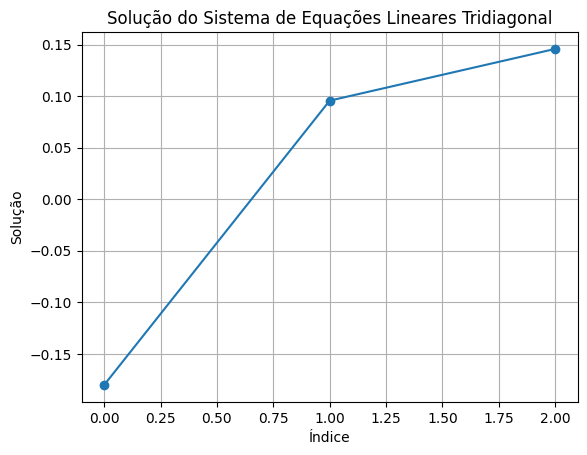

In [4]:
# Saída da função thomas_algorithm
y_d = algoritmo_thomas(diag_principal_d, diag_abaixo_d, diag_acima_d, b_d)

# Plotagem do gráfico
plt.plot(y_d, marker='o', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Solução')
plt.title('Solução do Sistema de Equações Lineares Tridiagonal')
plt.grid(True)
plt.show()

# Problema de Robin
### xy" + 3y' + (x**2) * y = exp(x)
### y'(0) = 1
### y(1) = -1
### h = 0,2

In [5]:
def Robin(h: float, x_ini: float, x_fin: float):
    n = int((x_fin - x_ini) / h) # Quantidade de passos
    
    diag_principal = [] # Recebe a diagonal principal
    diag_abaixo = [] # Recebe a diagonal que está abaixo da principal
    diag_acima = [] # Recebe a diagonal que está acima da principal
    
    b = np.zeros((n - 1)) # Armazena o vetor b
    
    x = [x_ini + i * h for i in range(n)] # Armazena todos os valores de x

    for i in range(0, n - 1):
        # Montando Matriz A
        for j in range(0, n - 1):
            # Configurando diagonal principal
            if j == 0: # Primeiro elemento da diagonal principal
                if i == j: # Diagonal Principal: 
                   diag_principal.append(-2 * x[i+1] - 3 * h + 2 * (h ** 2) * (x[i+1] ** 2))
            else:
                if i == j: # Diagonal Principal: 
                    diag_principal.append(-4 * x[i+1] + 2 * (h**2) * (x[i+1] ** 2))
            
            # Configurando diagonais adjacentes                
            if (j - 1) == i: # Diagonal Acima:
                diag_acima.append(2 * x[i+1] * 3 * h)
            
            elif (i - 1) == j: # Diagonal Abaixo: 
                diag_abaixo.append(2 * x[i+1] - 3 * h)
                
        # Montando Vetor B
        if i == 0: # Se for o primeiro
            b[i] = 2 * (h ** 2) * exp(x[i+1]) + 2 * x[i+1] - 3 * (h ** 2)
            
        elif i == n - 2: # Se for o último
            b[i] = 2 * (h ** 2) * exp(x[i+1]) + 2 * x[i+1] + 3 * (h ** 2)
            
        else: 
            b[i] = 2 * (h ** 2) * exp(x[i+1])
            
            
    return diag_principal, diag_abaixo, diag_acima, b


diag_principal_r, diag_abaixo_r, diag_acima_r, b_r = Robin(0.2, 0, 1)

### Plotagem gráfico da Matriz

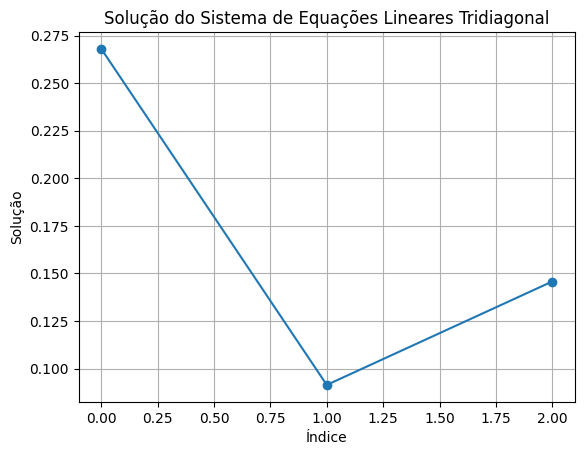

In [6]:
# Saída da função thomas_algorithm
y_r = algoritmo_thomas(diag_principal_r, diag_abaixo_r, diag_acima_r, b_r)

# Plotagem do gráfico
plt.plot(y_r, marker='o', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Solução')
plt.title('Solução do Sistema de Equações Lineares Tridiagonal')
plt.grid(True)
plt.show()

# Problema de Newman
### xy" + 3y' + (x**2) * y = exp(x)
### y'(0) = 1
### y'(1) = -1
### h = 0,2

In [7]:
def Newman(h: float, x_ini: float, x_fin: float):
    n = int((x_fin - x_ini) / h) # Quantidade de passos
    
    diag_principal = [] # Recebe a diagonal principal
    diag_abaixo = [] # Recebe a diagonal que está abaixo da principal
    diag_acima = [] # Recebe a diagonal que está acima da principal
    
    b = np.zeros((n - 1)) # Armazena o vetor b
    
    x = [x_ini + i * h for i in range(n)] # Armazena todos os valores de x

    for i in range(0, n - 1):
        for j in range(0, n - 1):
            # Configurando diagonal principal
            if j == 0: # Primeiro elemento da diagonal principal
                if i == j: # Diagonal Principal: 
                    diag_principal.append(-2 * x[i+1] - 3 * h + 2 * (h ** 2) * (x[i+1] ** 2))
                    
            elif j == n - 2: # Último elemento da diagonal principal
                if i == j: # Diagonal Principal: 
                    diag_principal.append(-2 * x[i+1] + 3 * h + 2 * (h ** 2) * (x[i+1] ** 2))
                
            else:
                if i == j: # Diagonal Principal: 
                    diag_principal.append(-4 * x[i+1] + 2 * (h**2) * (x[i+1] ** 2))
            
            # Configurando diagonais adjacentes                
            if (j - 1) == i: # Diagonal Acima:
                diag_acima.append(2 * x[i+1] * 3 * h)
            
            elif (i - 1) == j: # Diagonal Abaixo: 
                diag_abaixo.append(2 * x[i+1] - 3 * h)
                
        # Montando Vetor B
        if i == 0: # Se for o primeiro
            b[i] = 2 * (h ** 2) * exp(x[i+1]) + 2 * x[i+1] - 3 * (h ** 2)
            
        elif i == n - 2: # Se for o último
            b[i] = 2 * (h ** 2) * exp(x[i+1]) - 2 * x[i+1] - 3 * (h ** 2)
            
        else: 
            b[i] = 2 * (h ** 2) * exp(x[i+1])
            
            
    return diag_principal, diag_abaixo, diag_acima, b


diag_principal_n, diag_abaixo_n, diag_acima_n, b_n = Newman(0.2, 0, 1)

### Plotagem gráfico da Matriz

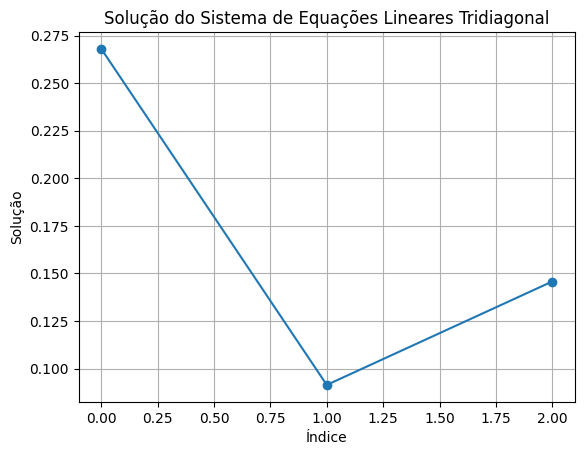

In [8]:
# Saída da função thomas_algorithm
y_n = algoritmo_thomas(diag_principal_n, diag_abaixo_n, diag_acima_n, b_n)

# Plotagem do gráfico
plt.plot(y_n, marker='o', linestyle='-')
plt.xlabel('Índice')
plt.ylabel('Solução')
plt.title('Solução do Sistema de Equações Lineares Tridiagonal')
plt.grid(True)
plt.show()

# Análise diagonais e vetor b

In [13]:
print(f'Diagonal principal Dirichlet: {diag_principal_d}')
print(f'Diagonal principal Robin: {diag_principal_r}')
print(f'Diagonal principal Newman: {diag_principal_n}')

Diagonal principal Dirichlet: [-0.8, -0.13010251630941283, -1.624584507231211, -3.1712000000000002]
Diagonal principal Robin: [-0.9968, -0.39491503769004715, -1.3588065847959385, -3.1488]
Diagonal principal Newman: [-0.9968, -0.39491503769004715, -1.3588065847959385, -0.9488]


In [14]:
print(f'Diagonal acinma Dirichlet: {diag_acima_d}')
print(f'Diagonal acinma Robin: {diag_acima_r}')
print(f'Diagonal acinma Newman: {diag_acima_n}')

Diagonal acinma Dirichlet: [5.000000000000001, 0.16309412861137, 1.2955807775899542]
Diagonal acinma Robin: [1.2000000000000004, 0.19164430816404748, 0.4950403204553841]
Diagonal acinma Newman: [1.2000000000000004, 0.19164430816404748, 0.4950403204553841]


In [15]:
print(f'Diagonal abaixo Dirichlet: {diag_abaixo_d}')
print(f'Diagonal abaixo Robin: {diag_abaixo_r}')
print(f'Diagonal abaixo Newman: {diag_abaixo_n}')

Diagonal abaixo Dirichlet: [1.0, 0.6000000000000001, 1.0]
Diagonal abaixo Robin: [1.0, 0.6000000000000001, 1.0]
Diagonal abaixo Newman: [1.0, 0.6000000000000001, 1.0]


In [16]:
print(f'Vetor b Dirichlet: {b_d}')
print(f'Vetor b Robin: {b_r}')
print(f'Vetor b Newman: {b_n}')

Vetor b Dirichlet: [ 0.29771222  0.11934598  0.1457695  -0.82195673]
Vetor b Robin: [0.37771222 0.11934598 0.1457695  1.89804327]
Vetor b Newman: [ 0.37771222  0.11934598  0.1457695  -1.54195673]
